## Get Data

The following code will read the .h5 files that result from running OSIRIS input deck. For this the directory for the MS folder must be specified.

In [57]:
from utilities.osiris.open import osiris_open_grid_data
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py


TypeError: Colorbar.set_label() missing 1 required positional argument: 'label'

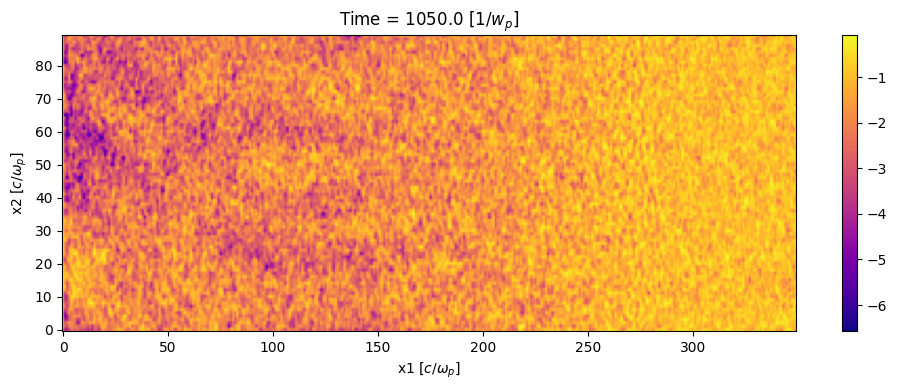

In [159]:
def color_map(file, xlim=0, ylim=0, xlabel='X-axis label', ylabel='Y-axis label', vmin=None, vmax=None):
    
    attrs, axes, data = osiris_open_grid_data(file)
    data_array = data[:]

    if xlim or ylim:
        selected_data = data_array[:xlim]
        selected_data = [inner_list[:ylim] for inner_list in selected_data]
        data_array = selected_data

    fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True, nrows=1, ncols=1)
    im = ax.imshow(data_array, aspect="auto", origin="lower", cmap="plasma", vmin=vmin, vmax=vmax)
    cbar = fig.colorbar(im)
    
    dt = attrs["DT"][0]
    ndump = 250 # is hard coded
    time = dt * ndump * int(file[-9:-3])

    ax.set_title(f"Time = {time}" +  " [$1 / w_{p}$]")
    ax.set_xlabel(ylabel)
    ax.set_ylabel(xlabel)
    
    # cbar.set_label('Colorbar Label', rotation=270, labelpad=15)
    
    plt.show()

# Example usage
color_map("/home/duarte-alex3/osiris-dev_2/osiris-dev/MS/DENSITY/electrons/charge/charge-electrons-000012.h5", xlim = 90, ylim = 350, xlabel = 'x2 [$c/ω_{p}$]', ylabel = 'x1 [$c/ω_{p}$]')

    

In [142]:
def get_means(file):

    attrs, axes, data = osiris_open_grid_data(file)
    data_array = data[:]
    x_avg = [0] * len(data_array[0])
    num_y = 0
    for y in data_array:
        num_y += 1
        for i in range(len(y)):
            x_avg[i] += y[i]
    
    for el in range(len(x_avg)):
        x_avg[el] = x_avg[el] / num_y

    return x_avg

In [ ]:
def get_fluctuations(file, x_avg):

    attrs, axes, data = osiris_open_grid_data(file)
    data_array = data[:]
    x_avg = [0] * len(data_array[0])
    num_y = 0
    for y in data_array:
        num_y += 1
        for i in range(len(y)):
            x_avg[i] += y[i]
    
    for el in range(len(x_avg)):
        x_avg[el] = x_avg[el] / num_y

    return x_avg

In [ ]:
E_fld = get_means
B_fld = get_means

In [80]:
# print(f"$[e w_{p}^{2}]$")
print("[$1 / w_{p}$]")


[$1 / w_{p}$]


In [136]:
def get_1D(file, x_avg):

    attrs, axes, data = osiris_open_grid_data(file)
    datash = data.shape
    ax1 = axes[0]
    ax2 = axes[1]
    x = np.linspace(ax1[0], ax1[1], datash[-1])
    print(x)

    #dt = 0.35
    #ndump = 250 # is hard coded
    #time = dt * ndump * int(file[-9:-3])
    #print(time)
    
    #fig, ax = plt.subplots(figsize=(10, 8), tight_layout=True)

    # ax.set_title(f"Time = {time}" + " [$1 / w_{p}$]")
    #ax.set_xlabel('x1 [$c/ω_{p}$]')
    #ax.set_ylabel(f"$\\rho$" + "$[e w_{p}^{2}]$")

    #plt.show(x, x_avg)

    fig, ax = plt.subplots(figsize=(10, 8), tight_layout=True)
    ax.plot(x, x_avg)  # Plot your data using ax.plot() function



[0.00000000e+00 5.00162813e-01 1.00032563e+00 ... 1.53499967e+03
 1.53549984e+03 1.53600000e+03]


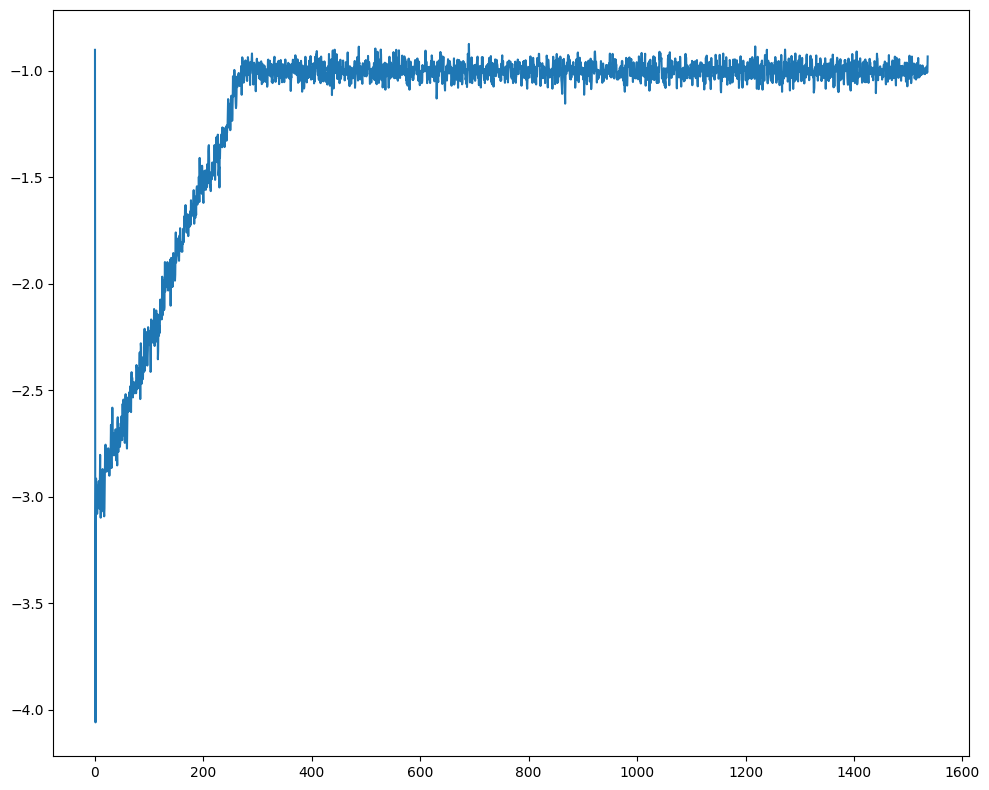

In [143]:
x_avg = get_quantity("/home/duarte-alex3/osiris-dev_2/osiris-dev/MS/DENSITY/electrons/charge/charge-electrons-000023.h5")
get_1D("/home/duarte-alex3/osiris-dev_2/osiris-dev/MS/DENSITY/electrons/charge/charge-electrons-000023.h5", x_avg)

In [ ]:
def get_fld_data(base_dir):

    fld_data = {}
    E_fld = ["e1", "e2", "e3"]
    B_fld = ["b1", "b2", "b3"]

	for e in E_fld:
        fld_data[e] = []
        h5_list = np.sort(np.array(os.listdir(base_dir + f"/{e}")))
        for file in h5_list:
            attrs, axes, data = osiris_open_grid_data(base_dir + f"/{}")
            fld_data[e].append(axes)


    for b in B_fld:

    attrs, axes, data = osiris_open_grid_data(base_dir)
datash = data.shape
ax1 = axes[0]
ax2 = axes[1]
x = np.linspace(ax1[0], ax1[1], datash[-1])
y = np.linspace(ax2[0], ax2[1], datash[-2])
data_array = data[:]

fig, ax = plt.subplots(figsize=(10, 8), tight_layout=True, nrows=1, ncols=1)
im = ax.imshow(data_array, aspect="auto", origin="lower", cmap="Reds", extent=[ax1[0], ax1[1], ax2[0], ax2[1]])
cbar = fig.colorbar(im)

plt.show()

dt = attrs["DT"][0]

In [ ]:
# If on Windows: base_dir = r'\\wsl$\Ubuntu-22.04\home\duarte-alex3\osiris-dev_2\osiris-dev\MS\'
# I am working on wsl
base_dir = "/home/duarte-alex3/osiris-dev_2/osiris-dev/MS/FLD"
# fld_data = get_fld_data(base_dir)